# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         23056950      1  regionprofile   
                                             277482448     1  regionprofile   
                                             342617063     1  regionprofile   
                                             362352209     1  regionprofile   
                                             1032065064    1  regionprofile   
                                             1491153857    1  regionprofile   
                                             1642830958    1  regionprofile   
                                             2104588869    1  regionprofile   
                                             2172300790    1  regionprofile   
                                             2456766213    1  regionprofile   
                                             2496855500    1  regionprofile   
                                             2565622787    1  regionprofile   
                                             2626279528    1  regionprofile   
                                             3043616485    1  regionprofile   
                                             3184293845    1  regionprofile   
                                             3446572744    1  regionprofile   
                                             3452477975    1  regionprofile   
                                             3526872179    1  regionprofile   
                                             3764152635    1  regionprofile   
                                             3925186993    1  regionprofile   
{'name': 'comm', 'type': 'function'}         23056950      3  regionprofile   
                                             277482448     3  regionprofile   
                                             342617063     3  regionprofile   
                                             362352209     3  regionprofile   
                                             1032065064    3  regionprofile   
                                             1491153857    3  regionprofile   
                                             1642830958    3  regionprofile   
                                             2104588869    3  regionprofile   
                                             2172300790    3  regionprofile   
                                             2456766213    3  regionprofile   
                                             2496855500    3  regionprofile   
                                             2565622787    3  regionprofile   
                                             2626279528    3  regionprofile   
                                             3043616485    3  regionprofile   
                                             3184293845    3  regionprofile   
                                             3446572744    3  regionprofile   
                                             3452477975    3  regionprofile   
                                             3526872179    3  regionprofile   
                                             3764152635    3  regionprofile   
                                             3925186993    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   23056950      4  regionprofile   
                                             277482448     4  regionprofile   
                                             342617063     4  regionprofile   
                                             362352209     4  regionprofile   
                                             1032065064    4  regionprofile   
                                             1491153857    4  regionprofile   
                                             1642830958    4  regionprofile   
                                             2104588869    4  regionprofile   
                                             2172300790    4  regionprofile   
                            

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
23056950,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223329,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 262144]",g,BitonicSort,CUDA,int,4,262144,Sorted,512,512,4,Handwritten
277482448,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223226,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,64,1024,4,Handwritten
342617063,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223414,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Sorted,512,2048,4,Handwritten
362352209,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223455,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 1, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Sorted,1,4194304,4,Handwritten
1032065064,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223238,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,256,256,4,Handwritten
1491153857,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223350,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Sorted,64,16384,4,Handwritten
1642830958,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223312,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 262144]",g,BitonicSort,CUDA,int,4,262144,Sorted,128,2048,4,Handwritten
2104588869,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223497,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Sorted,512,8192,4,Handwritten
2172300790,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223312,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 262144]",g,BitonicSort,CUDA,int,4,262144,Sorted,256,1024,4,Handwritten


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy_1
├─ 1.000 comp
│  └─ 1.000 comp_large
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ab1bbe64dc0>, 262144: <thicket.thicket.Thicket object at 0x2ab1bbd893d0>, 1048576: <thicket.thicket.Thicket object at 0x2ab1bbdc0a90>, 4194304: <thicket.thicket.Thicket object at 0x2ab1bbdae520>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2ab1bbe64dc0>, 262144: <thicket.thicket.Thicket object at 0x2ab1bbd893d0>, 1048576: <thicket.thicket.Thicket object at 0x2ab1bbdc0a90>, 4194304: <thicket.thicket.Thicket object at 0x2ab1bbdae520>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2ab1bbe64dc0>, <thicket.thicket.Thicket object at 0x2ab1bbd893d0>, <thicket.thicket.Thicket object at 0x2ab1bbdc0a90>, <thicket.thicket.Thicket object at 0x2ab1bbdae520>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [11]:
ctk.dataframe

65536                 \
                                                           nid   spot.channel   
node                                         num_threads                        
{'name': 'main', 'type': 'function'}         1               1  regionprofile   
                                             64              1  regionprofile   
                                             128             1  regionprofile   
                                             256             1  regionprofile   
                                             512             1  regionprofile   
{'name': 'comm', 'type': 'function'}         1               3  regionprofile   
                                             64              3  regionprofile   
                                             128             3  regionprofile   
                                             256             3  regionprofile   
                                             512             3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   1               4  regionprofile   
                                             64              4  regionprofile   
                                             128             4  regionprofile   
                                             256             4  regionprofile   
                                             512             4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 1               5  regionprofile   
                                             64              5  regionprofile   
                                             128             5  regionprofile   
                                             256             5  regionprofile   
                                             512             5  regionprofile   
{'name': 'comp', 'type': 'function'}         1               6  regionprofile   
                                             64              6  regionprofile   
                                             128             6  regionprofile   
                                             256             6  regionprofile   
                                             512             6  regionprofile   
{'name': 'comp_large', 'type': 'function'}   1               7  regionprofile   
                                             64              7  regionprofile   
                                             128             7  regionprofile   
                                             256             7  regionprofile   
                                             512             7  regionprofile   
{'name': 'data_init', 'type': 'function'}    1               2  regionprofile   
                                             64              2  regionprofile   
                                             128             2  regionprofile   
                                             256             2  regionprofile   
                                             512             2  regionprofile   

                                                                        \
                                                         Min time/rank   
node                                         num_threads                 
{'name': 'main', 'type': 'function'}         1                0.340760   
                                             64               0.473958   
                                             128              0.494237   
                                             256              0.332196   
                                             512              0.332821   
{'name': 'comm', 'type': 'function'}         1                0.000141   
                                             64               0.000163   
                                             128              0.000161   
                                             256              0.000143   
                                             512              0.000144   
{'name': 'comm_l

Perform pandas operations to get the table in a desirable format for plotting

In [12]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [13]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [14]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [16]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [17]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [18]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [19]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [20]:
ctk.dataframe

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         1                0.340760      0.373974      0.532903   
             64               0.473958      0.334493      0.336923   
             128              0.494237      0.326121      0.327462   
             256              0.332196      0.328215      0.330874   
             512              0.332821      0.330573      0.336186   
comm         1                0.000141      0.000330      0.001073   
             64               0.000163      0.000316      0.001059   
             128              0.000161      0.000328      0.001063   
             256              0.000143      0.000326      0.001061   
             512              0.000144      0.000329      0.001060   
comm_large   1                0.000111      0.000297      0.001041   
             64               0.000130      0.000281      0.001027   
             128              0.000129      0.000295      0.001030   
             256              0.000111      0.000293      0.001028   
             512              0.000112      0.000283      0.001029   
cudaMemcpy_1 1                0.000096      0.000280      0.001022   
             64               0.000114      0.000264      0.001009   
             128              0.000114      0.000278      0.001013   
             256              0.000097      0.000275      0.001012   
             512              0.000098      0.000266      0.001011   
comp         1                0.000409      0.000492      0.000571   
             64               0.000449      0.000492      0.000581   
             128              0.000470      0.000525      0.000590   
             256              0.000425      0.000508      0.000591   
             512              0.000399      0.000488      0.000621   
comp_large   1                0.000400      0.000483      0.000561   
             64               0.000440      0.000481      0.000571   
             128              0.000460      0.000515      0.000580   
             256              0.000416      0.000498      0.000581   
             512              0.000390      0.000479      0.000610   
data_init    1                0.000234      0.000903      0.003060   
             64               0.000236      0.000839      0.002497   
             128              0.000246      0.000839      0.003053   
             256              0.000225      0.000870      0.003018   
             512              0.000245      0.000865      0.003008   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         1                1.177786  
             64               0.367439  
             128              0.363115  
             256              0.373638  
             512              0.356221  
comm         1                0.003715  
             64               0.003720  
             128              0.003741  
             256              0.003744  
             512              0.003748  
comm_large   1                0.003683  
             64               0.003687  
             128              0.003709  
             256              0.003711  
             512              0.003717  
cudaMemcpy_1 1                0.003665  
             64               0.003669  
             128              0.003691  
             256              0.003692  
             512              0.003698  
comp         1                0.000702  
             64               0.000690  
             128              0.000713  
             256              0.000723  
             512              0.000730  
comp_large   1                0.000692  
             64               0.000680  
             128              0.000702  
             256              0.000712  
             512              0.000720  
data_init    1     

In [21]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [22]:
df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,Avg time/rank
num_threads,
1,0.340760
64,0.473958
128,0.494237
256,0.332196
512,0.332821


In [23]:
# import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

In [24]:
# # for matrix in matrix_sizes:
    
# for name in function_names:
#     plot_pandas(
#         df=ctk.dataframe.loc[name],
#         title=name,
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         loglog=True,
#         figsize=(20, 20)
#     )
#     plt.show()

In [25]:
# ctk.dataframe

## SPEEDUP -------------------------------------------------------------------------------------------------------


In [26]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [27]:
speedup_df

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         1                1.000000      1.000000      1.000000   
             64               0.718967      1.118032      1.581676   
             128              0.689467      1.146734      1.627374   
             256              1.025780      1.139418      1.610592   
             512              1.023854      1.131290      1.585143   
comm         1                1.000000      1.000000      1.000000   
             64               0.865031      1.044304      1.013220   
             128              0.875776      1.006098      1.009407   
             256              0.986014      1.012270      1.011310   
             512              0.979167      1.003040      1.012264   
comm_large   1                1.000000      1.000000      1.000000   
             64               0.853846      1.056940      1.013632   
             128              0.860465      1.006780      1.010680   
             256              1.000000      1.013652      1.012646   
             512              0.991071      1.049470      1.011662   
cudaMemcpy_1 1                1.000000      1.000000      1.000000   
             64               0.842105      1.060606      1.012884   
             128              0.842105      1.007194      1.008885   
             256              0.989691      1.018182      1.009881   
             512              0.979592      1.052632      1.010880   
comp         1                1.000000      1.000000      1.000000   
             64               0.910913      1.000000      0.982788   
             128              0.870213      0.937143      0.967797   
             256              0.962353      0.968504      0.966159   
             512              1.025063      1.008197      0.919485   
comp_large   1                1.000000      1.000000      1.000000   
             64               0.909091      1.004158      0.982487   
             128              0.869565      0.937864      0.967241   
             256              0.961538      0.969880      0.965577   
             512              1.025641      1.008351      0.919672   
data_init    1                1.000000      1.000000      1.000000   
             64               0.991525      1.076281      1.225471   
             128              0.951220      1.076281      1.002293   
             256              1.040000      1.037931      1.013917   
             512              0.955102      1.043931      1.017287   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         1                1.000000  
             64               3.205392  
             128              3.243562  
             256              3.152211  
             512              3.306335  
comm         1                1.000000  
             64               0.998656  
             128              0.993050  
             256              0.992254  
             512              0.991195  
comm_large   1                1.000000  
             64               0.998915  
             128              0.992990  
             256              0.992455  
             512              0.990853  
cudaMemcpy_1 1                1.000000  
             64               0.998910  
             128              0.992956  
             256              0.992687  
             512              0.991076  
comp         1                1.000000  
             64               1.017391  
             128              0.984572  
             256              0.970954  
             512              0.961644  
comp_large   1                1.000000  
             64               1.017647  
             128              0.985755  
             256              0.971910  
             512              0.961111  
data_init    1     

<Figure size 1440x1440 with 0 Axes>

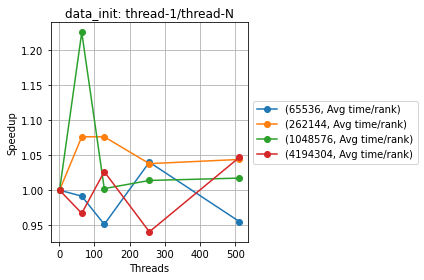

<Figure size 1440x1440 with 0 Axes>

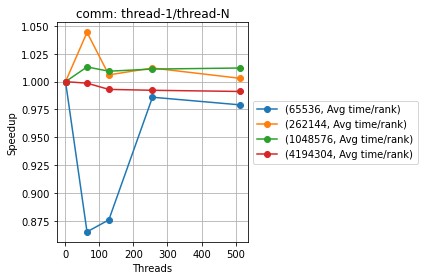

<Figure size 1440x1440 with 0 Axes>

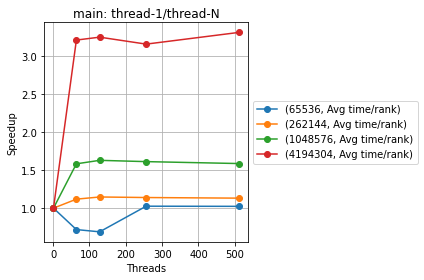

<Figure size 1440x1440 with 0 Axes>

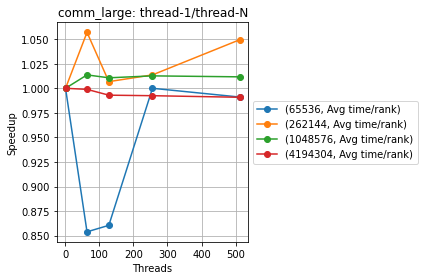

<Figure size 1440x1440 with 0 Axes>

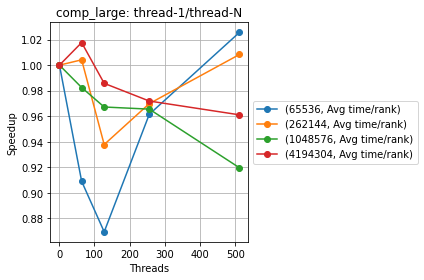

<Figure size 1440x1440 with 0 Axes>

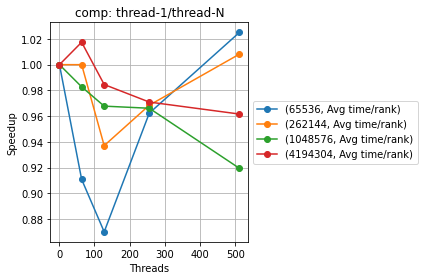

<Figure size 1440x1440 with 0 Axes>

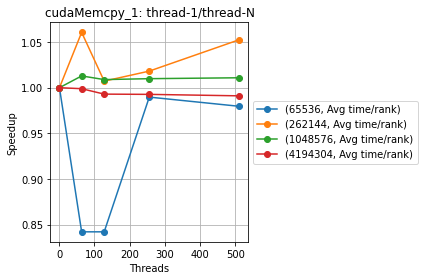

In [28]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## Weak Scaling ---------------------------------------------------------------------------------------

In [31]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("sorted-1/*.cali"))

In [32]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         135686796     1  regionprofile   
                                             169734258     1  regionprofile   
                                             330910610     1  regionprofile   
                                             391944452     1  regionprofile   
                                             617797870     1  regionprofile   
                                             671217177     1  regionprofile   
                                             833249972     1  regionprofile   
                                             910916541     1  regionprofile   
                                             1381186070    1  regionprofile   
                                             1756449700    1  regionprofile   
                                             1966605608    1  regionprofile   
                                             2269549162    1  regionprofile   
                                             2721476937    1  regionprofile   
                                             2770011843    1  regionprofile   
                                             2785690730    1  regionprofile   
                                             3968239923    1  regionprofile   
{'name': 'comm', 'type': 'function'}         135686796     3  regionprofile   
                                             169734258     3  regionprofile   
                                             330910610     3  regionprofile   
                                             391944452     3  regionprofile   
                                             617797870     3  regionprofile   
                                             671217177     3  regionprofile   
                                             833249972     3  regionprofile   
                                             910916541     3  regionprofile   
                                             1381186070    3  regionprofile   
                                             1756449700    3  regionprofile   
                                             1966605608    3  regionprofile   
                                             2269549162    3  regionprofile   
                                             2721476937    3  regionprofile   
                                             2770011843    3  regionprofile   
                                             2785690730    3  regionprofile   
                                             3968239923    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   135686796     4  regionprofile   
                                             169734258     4  regionprofile   
                                             330910610     4  regionprofile   
                                             391944452     4  regionprofile   
                                             617797870     4  regionprofile   
                                             671217177     4  regionprofile   
                                             833249972     4  regionprofile   
                                             910916541     4  regionprofile   
                                             1381186070    4  regionprofile   
                                             1756449700    4  regionprofile   
                                             1966605608    4  regionprofile   
                                             2269549162    4  regionprofile   
                                             2721476937    4  regionprofile   
                                             2770011843    4  regionprofile   
                                             2785690730    4  regionprofile   
                                             3968239923    4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 135686796     5  regionprofile   
                            

In [33]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
135686796,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223247,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,512,128,4,Handwritten
169734258,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223464,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Sorted,128,32768,4,Handwritten
330910610,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223291,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 262144]",g,BitonicSort,CUDA,int,4,262144,Sorted,64,4096,4,Handwritten
391944452,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223350,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Sorted,64,16384,4,Handwritten
617797870,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223477,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 4194304]",g,BitonicSort,CUDA,int,4,4194304,Sorted,256,16384,4,Handwritten
671217177,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223360,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Sorted,128,8192,4,Handwritten
833249972,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223238,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,256,256,4,Handwritten
910916541,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223226,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,128,512,4,Handwritten
1381186070,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223414,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 1048576]",g,BitonicSort,CUDA,int,4,1048576,Sorted,512,2048,4,Handwritten


In [34]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [35]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ab1bebe0eb0>, 262144: <thicket.thicket.Thicket object at 0x2ab1bebe43a0>, 1048576: <thicket.thicket.Thicket object at 0x2ab1bec01f10>, 4194304: <thicket.thicket.Thicket object at 0x2ab1bebcc820>}


In [36]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [37]:
ctk.dataframe

65536                 \
                                                           nid   spot.channel   
node                                         num_threads                        
{'name': 'main', 'type': 'function'}         64              1  regionprofile   
                                             128             1  regionprofile   
                                             256             1  regionprofile   
                                             512             1  regionprofile   
{'name': 'comm', 'type': 'function'}         64              3  regionprofile   
                                             128             3  regionprofile   
                                             256             3  regionprofile   
                                             512             3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   64              4  regionprofile   
                                             128             4  regionprofile   
                                             256             4  regionprofile   
                                             512             4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64              5  regionprofile   
                                             128             5  regionprofile   
                                             256             5  regionprofile   
                                             512             5  regionprofile   
{'name': 'comp', 'type': 'function'}         64              6  regionprofile   
                                             128             6  regionprofile   
                                             256             6  regionprofile   
                                             512             6  regionprofile   
{'name': 'comp_large', 'type': 'function'}   64              7  regionprofile   
                                             128             7  regionprofile   
                                             256             7  regionprofile   
                                             512             7  regionprofile   
{'name': 'data_init', 'type': 'function'}    64              2  regionprofile   
                                             128             2  regionprofile   
                                             256             2  regionprofile   
                                             512             2  regionprofile   

                                                                        \
                                                         Min time/rank   
node                                         num_threads                 
{'name': 'main', 'type': 'function'}         64               0.473958   
                                             128              0.494237   
                                             256              0.332196   
                                             512              0.332821   
{'name': 'comm', 'type': 'function'}         64               0.000163   
                                             128              0.000161   
                                             256              0.000143   
                                             512              0.000144   
{'name': 'comm_large', 'type': 'function'}   64               0.000130   
                                             128              0.000129   
                                             256              0.000111   
                                             512              0.000112   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64               0.000114   
                                             128              0.000114   
                                             256              0.000097   
                                             512              0.000098   
{'name': 'comp', 'type': 'function'}         64               0.000449   
                                             128              0.0

In [38]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [39]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [40]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [41]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [42]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [43]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [44]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [45]:
ctk.dataframe

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         64               0.473958      0.334493      0.336923   
             128              0.494237      0.326121      0.327462   
             256              0.332196      0.328215      0.330874   
             512              0.332821      0.330573      0.336186   
comm         64               0.000163      0.000316      0.001059   
             128              0.000161      0.000328      0.001063   
             256              0.000143      0.000326      0.001061   
             512              0.000144      0.000329      0.001060   
comm_large   64               0.000130      0.000281      0.001027   
             128              0.000129      0.000295      0.001030   
             256              0.000111      0.000293      0.001028   
             512              0.000112      0.000283      0.001029   
cudaMemcpy_1 64               0.000114      0.000264      0.001009   
             128              0.000114      0.000278      0.001013   
             256              0.000097      0.000275      0.001012   
             512              0.000098      0.000266      0.001011   
comp         64               0.000449      0.000492      0.000581   
             128              0.000470      0.000525      0.000590   
             256              0.000425      0.000508      0.000591   
             512              0.000399      0.000488      0.000621   
comp_large   64               0.000440      0.000481      0.000571   
             128              0.000460      0.000515      0.000580   
             256              0.000416      0.000498      0.000581   
             512              0.000390      0.000479      0.000610   
data_init    64               0.000236      0.000839      0.002497   
             128              0.000246      0.000839      0.003053   
             256              0.000225      0.000870      0.003018   
             512              0.000245      0.000865      0.003008   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         64               0.367439  
             128              0.363115  
             256              0.373638  
             512              0.356221  
comm         64               0.003720  
             128              0.003741  
             256              0.003744  
             512              0.003748  
comm_large   64               0.003687  
             128              0.003709  
             256              0.003711  
             512              0.003717  
cudaMemcpy_1 64               0.003669  
             128              0.003691  
             256              0.003692  
             512              0.003698  
comp         64               0.000690  
             128              0.000713  
             256              0.000723  
             512              0.000730  
comp_large   64               0.000680  
             128              0.000702  
             256              0.000712  
             512              0.000720  
data_init    64               0.011416  
             128              0.010754  
             256              0.011737  
             512              0.010543

In [46]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [47]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc['main','comm','comm_large','cudaMemcpy_1','comp','comp_large','data_init'] # all rows 1 column


# df_1 = ctk.dataframe.loc[:] # all rows 1 column

# df_1

df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
# df_1
# df_1 = ctk.dataframe.reset_index().drop([("name", "")], axis=1)
# df_1
# df_1 = df_1.loc[]

df_2 = df_1.loc[[64,128,256,512]]
df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,65536,262144,1048576,4194304
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_threads,,,,
64,0.473958,0.334493,0.336923,0.367439
128,0.494237,0.326121,0.327462,0.363115
256,0.332196,0.328215,0.330874,0.373638
512,0.332821,0.330573,0.336186,0.356221


In [48]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

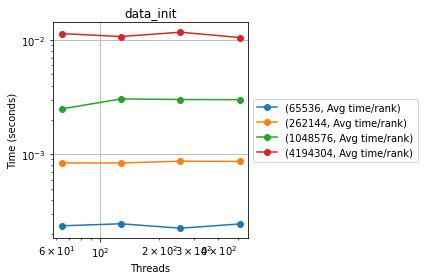

<Figure size 1440x1440 with 0 Axes>

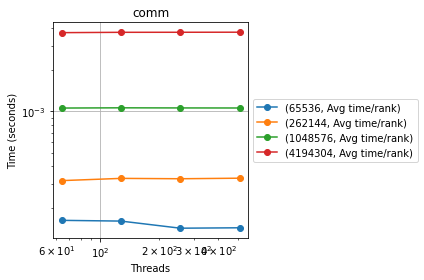

<Figure size 1440x1440 with 0 Axes>

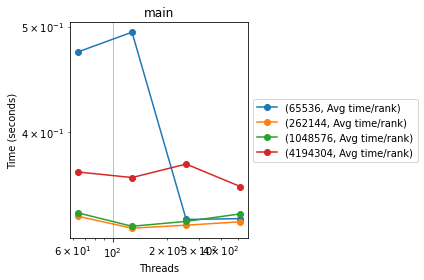

<Figure size 1440x1440 with 0 Axes>

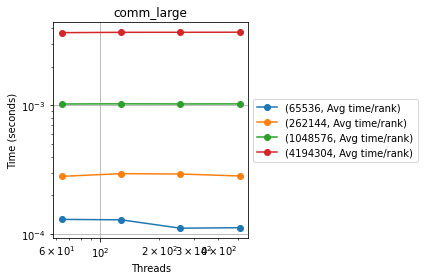

<Figure size 1440x1440 with 0 Axes>

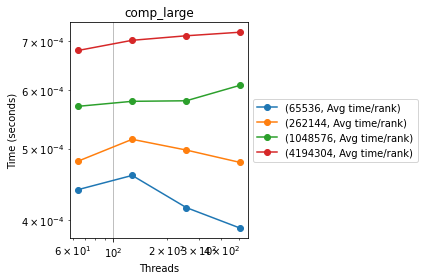

<Figure size 1440x1440 with 0 Axes>

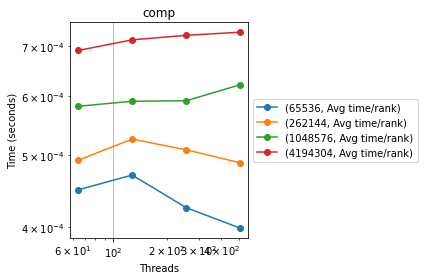

<Figure size 1440x1440 with 0 Axes>

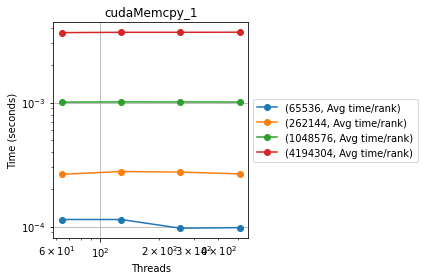

In [49]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [50]:
ctk.dataframe

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         64               0.473958      0.334493      0.336923   
             128              0.494237      0.326121      0.327462   
             256              0.332196      0.328215      0.330874   
             512              0.332821      0.330573      0.336186   
comm         64               0.000163      0.000316      0.001059   
             128              0.000161      0.000328      0.001063   
             256              0.000143      0.000326      0.001061   
             512              0.000144      0.000329      0.001060   
comm_large   64               0.000130      0.000281      0.001027   
             128              0.000129      0.000295      0.001030   
             256              0.000111      0.000293      0.001028   
             512              0.000112      0.000283      0.001029   
cudaMemcpy_1 64               0.000114      0.000264      0.001009   
             128              0.000114      0.000278      0.001013   
             256              0.000097      0.000275      0.001012   
             512              0.000098      0.000266      0.001011   
comp         64               0.000449      0.000492      0.000581   
             128              0.000470      0.000525      0.000590   
             256              0.000425      0.000508      0.000591   
             512              0.000399      0.000488      0.000621   
comp_large   64               0.000440      0.000481      0.000571   
             128              0.000460      0.000515      0.000580   
             256              0.000416      0.000498      0.000581   
             512              0.000390      0.000479      0.000610   
data_init    64               0.000236      0.000839      0.002497   
             128              0.000246      0.000839      0.003053   
             256              0.000225      0.000870      0.003018   
             512              0.000245      0.000865      0.003008   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         64               0.367439  
             128              0.363115  
             256              0.373638  
             512              0.356221  
comm         64               0.003720  
             128              0.003741  
             256              0.003744  
             512              0.003748  
comm_large   64               0.003687  
             128              0.003709  
             256              0.003711  
             512              0.003717  
cudaMemcpy_1 64               0.003669  
             128              0.003691  
             256              0.003692  
             512              0.003698  
comp         64               0.000690  
             128              0.000713  
             256              0.000723  
             512              0.000730  
comp_large   64               0.000680  
             128              0.000702  
             256              0.000712  
             512              0.000720  
data_init    64               0.011416  
             128              0.010754  
             256              0.011737  
             512              0.010543

## STRONG SCALING ------------------------------------------------------------------------------------


In [51]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("everything_rand/*.cali"))

In [52]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         796374811     1  regionprofile   
                                             796995604     1  regionprofile   
                                             958709685     1  regionprofile   
                                             1126558912    1  regionprofile   
                                             1441184986    1  regionprofile   
                                             1569848941    1  regionprofile   
                                             1710324419    1  regionprofile   
                                             1912970468    1  regionprofile   
                                             2021907896    1  regionprofile   
                                             3087516549    1  regionprofile   
                                             3180793797    1  regionprofile   
                                             3332496848    1  regionprofile   
                                             3529454472    1  regionprofile   
                                             3601747526    1  regionprofile   
                                             3873394920    1  regionprofile   
                                             4225153812    1  regionprofile   
{'name': 'comm', 'type': 'function'}         796374811     3  regionprofile   
                                             796995604     3  regionprofile   
                                             958709685     3  regionprofile   
                                             1126558912    3  regionprofile   
                                             1441184986    3  regionprofile   
                                             1569848941    3  regionprofile   
                                             1710324419    3  regionprofile   
                                             1912970468    3  regionprofile   
                                             2021907896    3  regionprofile   
                                             3087516549    3  regionprofile   
                                             3180793797    3  regionprofile   
                                             3332496848    3  regionprofile   
                                             3529454472    3  regionprofile   
                                             3601747526    3  regionprofile   
                                             3873394920    3  regionprofile   
                                             4225153812    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   796374811     4  regionprofile   
                                             796995604     4  regionprofile   
                                             958709685     4  regionprofile   
                                             1126558912    4  regionprofile   
                                             1441184986    4  regionprofile   
                                             1569848941    4  regionprofile   
                                             1710324419    4  regionprofile   
                                             1912970468    4  regionprofile   
                                             2021907896    4  regionprofile   
                                             3087516549    4  regionprofile   
                                             3180793797    4  regionprofile   
                                             3332496848    4  regionprofile   
                                             3529454472    4  regionprofile   
                                             3601747526    4  regionprofile   
                                             3873394920    4  regionprofile   
                                             4225153812    4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 796374811     5  regionprofile   
                            

In [53]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
796374811,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027303,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,128,2048,4,Handwritten
796995604,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223291,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 262144]",g,BitonicSort,CUDA,int,4,262144,Sorted,64,4096,4,Handwritten
958709685,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224237,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 262144]",g,BitonicSort,CUDA,int,4,262144,1perturbed,64,4096,4,Handwritten
1126558912,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224263,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 262144]",g,BitonicSort,CUDA,int,4,262144,1perturbed,256,1024,4,Handwritten
1441184986,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223985,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 262144]",g,BitonicSort,CUDA,int,4,262144,ReverseSorted,128,2048,4,Handwritten
1569848941,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224285,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 262144]",g,BitonicSort,CUDA,int,4,262144,1perturbed,512,512,4,Handwritten
1710324419,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224021,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 262144]",g,BitonicSort,CUDA,int,4,262144,ReverseSorted,512,512,4,Handwritten
1912970468,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027323,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,512,512,4,Handwritten
2021907896,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027323,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 262144]",g,BitonicSort,CUDA,int,4,262144,Random,256,1024,4,Handwritten


In [54]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [55]:
gb = tk.groupby("InputType")

4  thickets created...
{'1perturbed': <thicket.thicket.Thicket object at 0x2ab1bec91a60>, 'Random': <thicket.thicket.Thicket object at 0x2ab1be95c280>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x2ab1beb96160>, 'Sorted': <thicket.thicket.Thicket object at 0x2ab1bea08550>}


In [56]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [57]:
ctk.dataframe

1perturbed  \
                                                                nid   
node                                         num_threads              
{'name': 'main', 'type': 'function'}         64                   1   
                                             128                  1   
                                             256                  1   
                                             512                  1   
{'name': 'comm', 'type': 'function'}         64                   3   
                                             128                  3   
                                             256                  3   
                                             512                  3   
{'name': 'comm_large', 'type': 'function'}   64                   4   
                                             128                  4   
                                             256                  4   
                                             512                  4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                   5   
                                             128                  5   
                                             256                  5   
                                             512                  5   
{'name': 'comp', 'type': 'function'}         64                   6   
                                             128                  6   
                                             256                  6   
                                             512                  6   
{'name': 'comp_large', 'type': 'function'}   64                   7   
                                             128                  7   
                                             256                  7   
                                             512                  7   
{'name': 'data_init', 'type': 'function'}    64                   2   
                                             128                  2   
                                             256                  2   
                                             512                  2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128       

In [58]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "spot.channel"), ("Random", "spot.channel"), ("ReverseSorted", "spot.channel"), ("Sorted", "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "nid"), ("Random", "nid"), ("ReverseSorted", "nid"), ("Sorted", "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [59]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [60]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Min time/rank"), ("Random", "Min time/rank"), ("ReverseSorted", "Min time/rank"), ("Sorted", "Min time/rank")], axis=1)

In [61]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Max time/rank"), ("Random", "Max time/rank"), ("ReverseSorted", "Max time/rank"), ("Sorted", "Max time/rank")], axis=1)

In [62]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Avg time/rank"), ("Random", "Avg time/rank"), ("ReverseSorted", "Avg time/rank"), ("Sorted", "Avg time/rank")], axis=1)

In [63]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [64]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [65]:
ctk.dataframe

1perturbed     Random ReverseSorted     Sorted
                         Total time Total time    Total time Total time
name         num_threads                                               
main         64            0.332920   0.332067      0.331273   0.334493
             128           0.340323   0.328475      0.328239   0.326121
             256           0.334376   0.531673      0.326909   0.328215
             512           0.334726   0.608071      0.331086   0.330573
comm         64            0.000313   0.000316      0.000313   0.000316
             128           0.000322   0.000320      0.000315   0.000328
             256           0.000314   0.000306      0.000316   0.000326
             512           0.000319   0.000328      0.000317   0.000329
comm_large   64            0.000282   0.000285      0.000281   0.000281
             128           0.000283   0.000286      0.000283   0.000295
             256           0.000281   0.000278      0.000285   0.000293
             512           0.000285   0.000298      0.000285   0.000283
cudaMemcpy_1 64            0.000265   0.000267      0.000264   0.000264
             128           0.000266   0.000269      0.000267   0.000278
             256           0.000265   0.000261      0.000268   0.000275
             512           0.000268   0.000282      0.000267   0.000266
comp         64            0.000483   0.000527      0.000525   0.000492
             128           0.000527   0.000491      0.000529   0.000525
             256           0.000536   0.000516      0.000507   0.000508
             512           0.000513   0.000443      0.000505   0.000488
comp_large   64            0.000473   0.000517      0.000515   0.000481
             128           0.000517   0.000480      0.000519   0.000515
             256           0.000526   0.000506      0.000497   0.000498
             512           0.000502   0.000434      0.000495   0.000479
data_init    64            0.004660   0.003216      0.001066   0.000839
             128           0.004659   0.003232      0.001076   0.000839
             256           0.004658   0.003254      0.001060   0.000870
             512           0.004619   0.003266      0.001063   0.000865

In [66]:
# ctk.dataframe = ctk.dataframe.loc[:,(65536)]

# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1
# ctk.dataframe

In [67]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [68]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

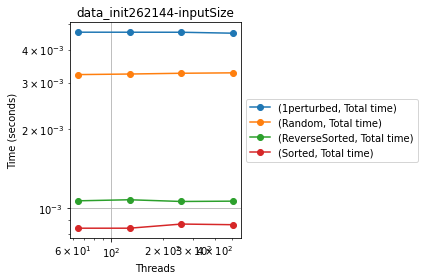

<Figure size 1440x1440 with 0 Axes>

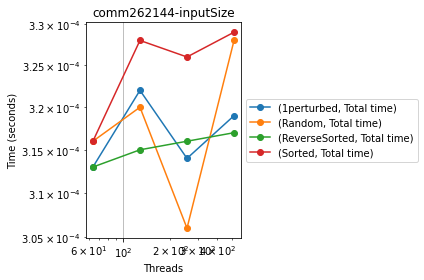

<Figure size 1440x1440 with 0 Axes>

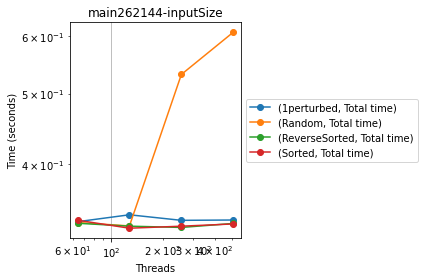

<Figure size 1440x1440 with 0 Axes>

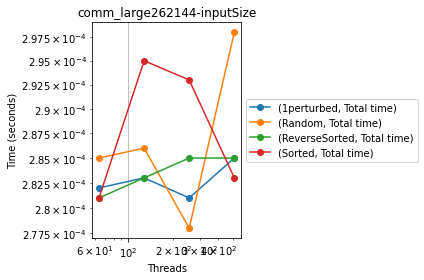

<Figure size 1440x1440 with 0 Axes>

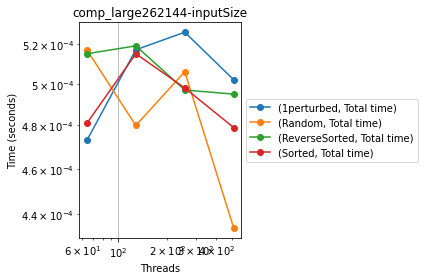

<Figure size 1440x1440 with 0 Axes>

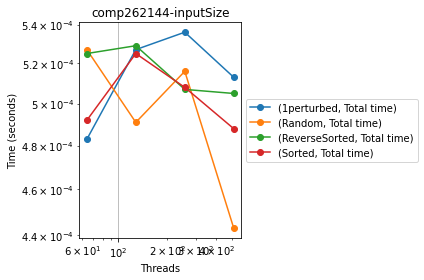

<Figure size 1440x1440 with 0 Axes>

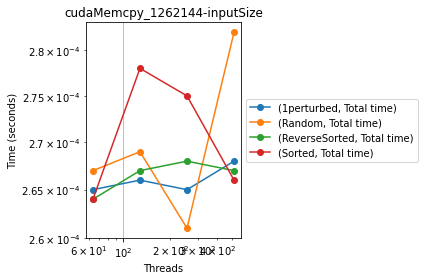

In [70]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name+"262144-inputSize",
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()